# Support Vectore Regression (SVR)

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Importing dataset

In [ ]:
dataset = pd.read_csv('position_salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
 y =y.reshape(len(y),1)

In [ ]:
print(y) #2d array

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x =sc_x.fit_transform(x)
y =sc_y.fit_transform(y)
#x_test[:, 3:] = sc.transform(x_test[:, 3:])

Standardization usually lowers the value from +3 and -3

In [10]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR Model on the whole datset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
# with radial basis kernel

In [13]:
regressor.fit(x, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

predicting a new result

In [16]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visulising the SVR results

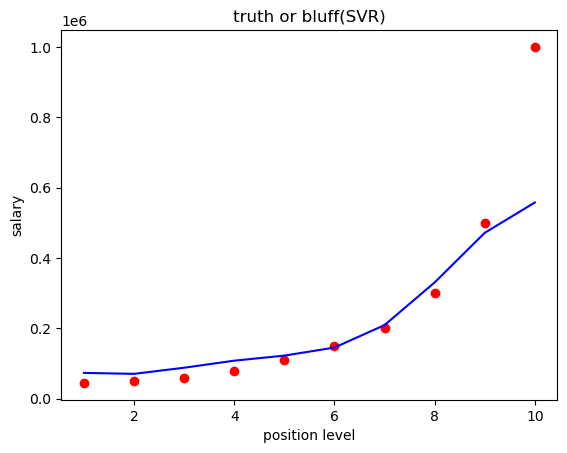

In [19]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color ='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)) , color ='blue')
plt.title('truth or bluff(SVR)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

Visulaising the SVR Result( for higher resolution and smoother curve)

/var/folders/5z/w106k2293m95fljl_vr_1jhr0000gn/T/ipykernel_82372/3511016810.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid =np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)),0.1)


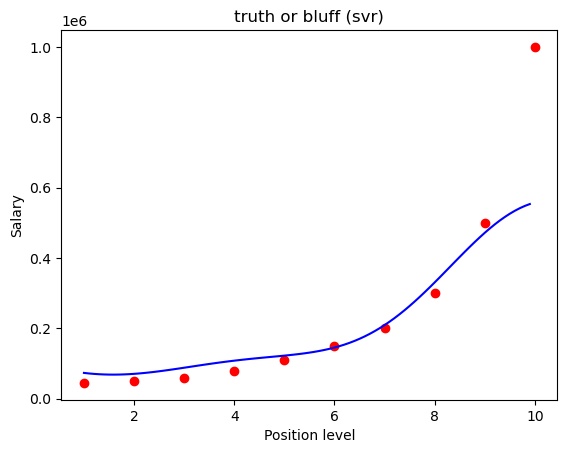

In [20]:
x_grid =np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color ='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color ='blue')
plt.title('truth or bluff (svr)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()